In [1]:
import pandas as pd
import numpy as np

from pipeline.preprocessing import preprocess

In [2]:
df = preprocess()
df

/orcd/home/002/corte911/code/finNN_code/src/pipeline/preprocessing.py:171: RuntimeWarning: invalid value encountered in log
  log_co = np.log(close / open_)


number of nans in var: 6


,permno,date,ret,close,vol,open,high,low,cfacpr,var,t
0,10078,2000-01-03,-0.012107,153.0,15270527.0,158.5,158.75,149.0,0.5,0.001527,0
1,10078,2000-01-04,-0.062092,143.5,21098710.0,146.875,150.5,143.0,0.5,0.001098,1
2,10078,2000-01-05,0.001742,143.75,30073258.0,140.25,147.0,133.25,0.5,0.004587,2
3,10078,2000-01-06,-0.053913,136.0,22741999.0,140.875,143.75,134.0,0.5,0.001987,3
4,10078,2000-01-07,0.056985,143.75,20450260.0,134.375,144.0,133.5,0.5,0.001109,4
...,...,...,...,...,...,...,...,...,...,...,...
155298,93436,2024-12-24,0.073572,462.28,59351506.0,435.89999,462.78,435.14001,1.0,0.000563,6284
155299,93436,2024-12-26,-0.01763,454.13,76392273.0,465.16,465.3299,451.01999,1.0,0.000265,6285
155300,93436,2024-12-27,-0.049479,431.66,82370345.0,449.51999,450.0,426.5,1.0,0.000803,6286
155301,93436,2024-12-30,-0.033012,417.41,64705452.0,419.39999,427.0,415.75,1.0,0.000348,6287


In [3]:
def variance(df):
    df = df.copy()
    
    # Pre-calculate the constant value
    C2 = 2 * np.log(2) - 1  # Approx. 0.3863

    # Extract NumPy arrays for faster computation
    high = df["high"].to_numpy()
    low = df["low"].to_numpy()
    close = df["close"].to_numpy()
    open_ = df["open"].to_numpy()

    # Calculate volatility using NumPy arrays
    log_hl = np.log(high / low)
    log_co = np.log(close / open_)
    
    df["var"] = 0.5 * (log_hl ** 2) - C2 * (log_co ** 2)

    print(f"number of nans in var: {df["var"].isna().sum()}")
    df = df.dropna()

    return df

df = variance(df)

df["var"].describe()


number of nans in var: 0


count    3.155297e+06
mean     4.704918e-04
std      5.001886e-02
min     -1.021525e-02
25%      7.993855e-05
50%      1.635333e-04
75%      3.620661e-04
max      8.423515e+01
Name: var, dtype: float64

In [6]:
np.sqrt(0.00016353330838816163*252)

np.float64(0.20300343276362776)

<Axes: >

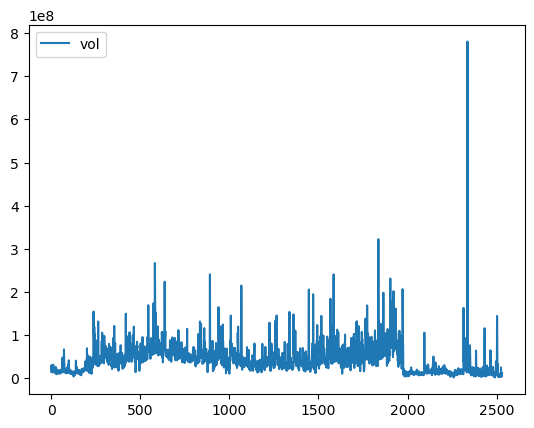

In [7]:
df[df["permno"]==10078][["vol"]].plot(kind="line")